In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure
import skimage.exposure as exposure
import cv2

def round(n):
    return np.round(n).astype(np.uint8)

##### 1. Take your picture, convert into a grey scale image and perform the following point operations (choose appropriate constants):

<ol type="a">
    <li>Image Negation</li>
    <li>Log transformation</li>
    <li>Gamma transformation</li>
</ol>

In [3]:
def invert(image):
    inverted_image = np.copy(image)
    inverted_image = 255 - inverted_image[:,:]
    return inverted_image

def log_transformation(image, c = 20):
    transformed_image = np.copy(image)
    (row,col) = transformed_image.shape
    for i in range(row):
        for j in range(col):
            transformed_image[i,j] = np.round(c*np.log10(1+transformed_image[i,j]))
    return transformed_image

def gamma_correction(image, c = 20, gamma = 0.2):
    transformed_image = np.copy(image)
    (row,col) = transformed_image.shape
    for i in range(row):
        for j in range(col):
            transformed_image[i,j] = np.round(c*(transformed_image[i,j])**gamma)
    return transformed_image

image = np.array(Image.open("./images/src/rahul.jpg").convert('L'))

# trans_image = invert(image)
# trans_image = log_transformation(image, c = 50)
trans_image = gamma_correction(image,c = 10, gamma = 0.5)


pil_img = Image.fromarray(trans_image)
pil_img.save("./images/temp/rahul_pil_save.jpg")

##### 2. Consider an image of your choice and perform histogram equalization and histogram matching. Choose a gray scale image or colour image

In [4]:
def histogram_equalization(im):
    f = {i:0 for i in range(256)}
    new_f = f.copy()
    pmf = f.copy()
    cdf = f.copy()
    (m,n) = im.shape
    N = m*n
    prev = 0
    
    # Calculate the frequency of each shade
    for i in range(m):
        for j in range(n):
            f[im[i,j]] += 1
    
    # Calculate the pmf
    for k in f:
        pmf[k] = f[k]/N
        
    # Calculate the cdf
    for k in pmf:
        cdf[k] = prev+pmf[k]
        prev = cdf[k]
    
    new_im = im.copy()
    
    # Do the equalization
    for i in range(m):
        for j in range(n):
            new_im[i,j] = round(255*cdf[im[i,j]])
            new_f[new_im[i,j]] += 1
    # res_im = np.concatenate((im,new_im),axis=1)
    res_im = new_im
    return res_im

In [5]:
image = np.array(Image.open("./images/src/dude.png").convert("L"))

trans_image = histogram_equalization(image)

pil_img = Image.fromarray(trans_image)
pil_img.save("./images/temp/dude_pil_save.png")

C:\Users\Asus\AppData\Local\Temp/ipykernel_22484/3229785616.py:4: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = exposure.match_histograms(source, reference, multichannel=True)


(<AxesSubplot:title={'center':'Matched'}>,
 Text(0.5, 1.0, 'Matched'))

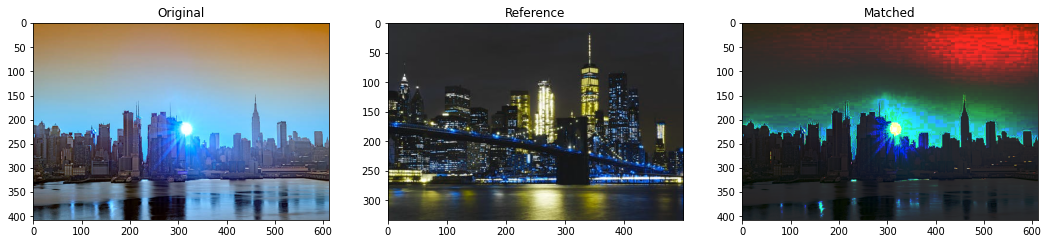

In [12]:

source = cv2.imread("./images/src/new_york_morning.jpg")
reference = cv2.imread("./images/src/new_york_night.jpeg")

matched = exposure.match_histograms(source, reference, multichannel=True)

# cv2.imshow("Source", source)
# cv2.imshow("Reference",reference)
# cv2.imshow("Matched",matched)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(131),plt.imshow(source),plt.title('Original')
plt.subplot(132),plt.imshow(reference),plt.title('Reference')
plt.subplot(133),plt.imshow(matched),plt.title('Matched')

##### 3. Take any of the image from the above link and perform both mean, median and Gaussian filters on it. Compare the results with respect to PSNR (peak signal to noise ratio)

In [39]:
img = cv2.imread("./images/src/deers.png")

def set_figure():
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(18)
    
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20*np.log10(max_pixel/np.sqrt(mse))
    return psnr

100

PSNR = 29.95226735113888


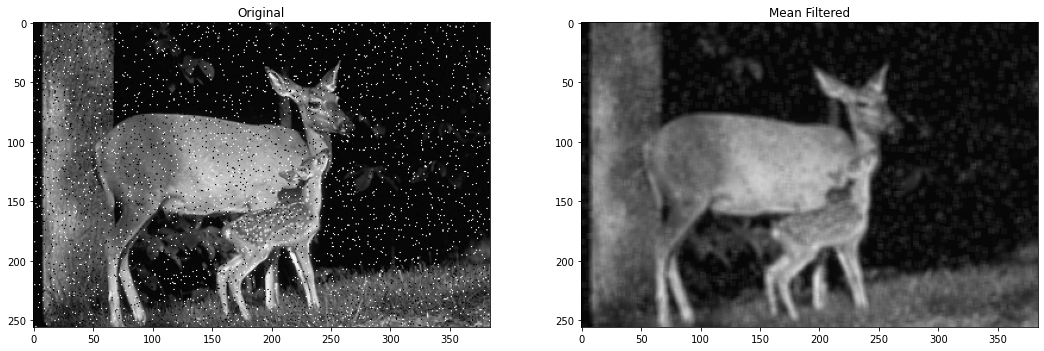

In [45]:
# mean filter

mean = cv2.blur(img, (5,5))

set_figure()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(mean),plt.title('Mean Filtered')

psnr = calculate_psnr(img, mean)
print(f"PSNR = {psnr}")

PSNR = 32.722789014165976


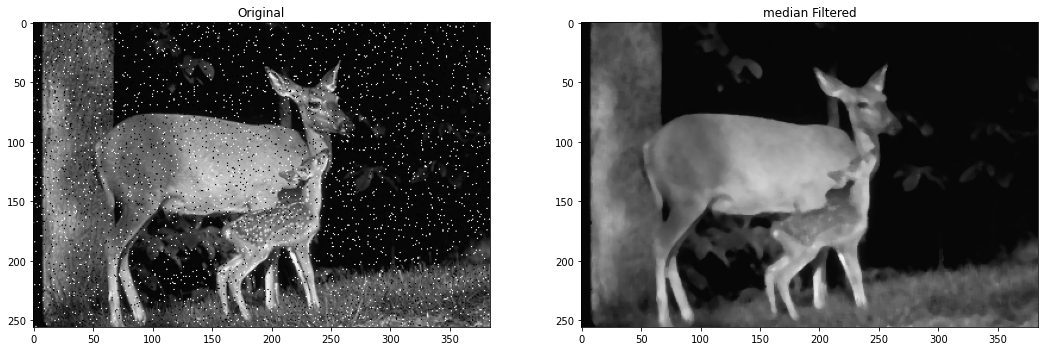

In [36]:
# median filter

median = cv2.medianBlur(img, 5)

set_figure()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(median),plt.title('median Filtered')

psnr = calculate_psnr(img, median)
print(f"PSNR = {psnr}")

PSNR = 31.053866751700966


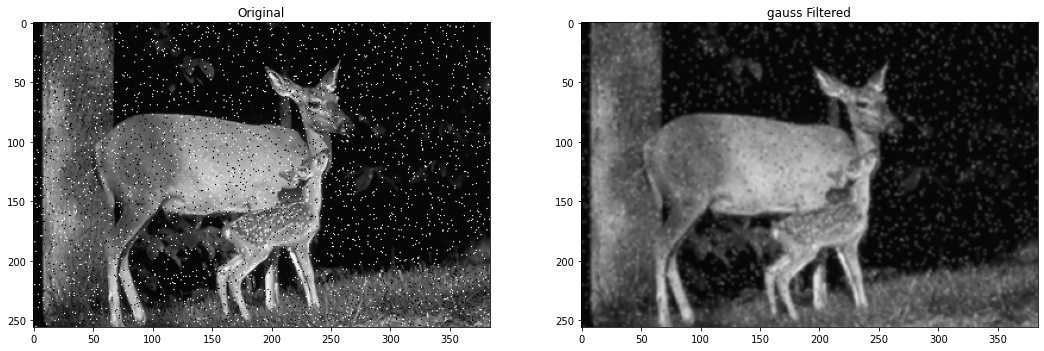

In [43]:
# Gaussian filter

gauss = cv2.GaussianBlur(img, (5,5), 0)

set_figure()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(gauss),plt.title('gauss Filtered')

psnr = calculate_psnr(img, gauss)
print(f"PSNR = {psnr}")